### Problem Statement
An analytics company has been tasked with the crucial job of finding out what factors affect a startup company and if it will be profitable or not. For this, they have collected some historical data and would like to apply multilinear regression to derive brief insights into their data. Predict profit, given different attributes for various startup companies.


### Business Objective:
The primary objective of this project is to help investors, entrepreneurs, and stakeholders understand the key factors influencing the profitability of a startup. By analyzing historical data of various startup companies, we aim to uncover patterns and relationships between different attributes (such as R&D spending, marketing expenditure, location, etc.) and their impact on profit. This analysis will guide decision-making for future startups, improving investment strategies and resource allocation.

## 1. Import Necessary libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 2. Load the dataset

In [17]:
df = pd.read_csv("C:/Data Science/Assignment Data/Multilinear_Dataset/Startups.csv")

In [18]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [19]:
# Explore the dataset
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There are no null values.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [21]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## 3.Exploring and encoding the categorical variables (if any)

In [22]:
# Check unique values in categorical column
print(df['State'].unique())

['New York' 'California' 'Florida']


If "State" contains unique values like 'New York', 'California', 'Florida', we will apply One-Hot Encoding.

### Apply one-hot encoding

In [23]:
# Apply One-Hot Encoding on 'State' column
df = pd.get_dummies(df, columns=['State'], drop_first=True)

# Display first few rows after encoding
print(df.head())

   R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
0  165349.20       136897.80        471784.10  192261.83              0   
1  162597.70       151377.59        443898.53  191792.06              0   
2  153441.51       101145.55        407934.54  191050.39              1   
3  144372.41       118671.85        383199.62  182901.99              0   
4  142107.34        91391.77        366168.42  166187.94              1   

   State_New York  
0               1  
1               0  
2               0  
3               1  
4               0  


In [24]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [25]:
df

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


This will create new binary columns like State_Florida, State_New York (assuming there are three states: California, Florida, and New York).

## 4.Define Features (X) and target(y)

In [26]:
#Now, separate the independent variables (features) and dependent variable (Profit).

X = df.drop(columns=['Profit'])  # Features
y = df['Profit']                 # Target variable

## 5. Split the Dataset into Training and Testing Sets

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (40, 5), Test set: (10, 5)


Now that the dataset is split into training and testing sets, the next step is training the Linear Regression model.

## Train the model

We will fit a Multilinear Regression model using the training dataset.

In [28]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 54028.039593645844
Coefficients: [ 8.05630064e-01 -6.87878823e-02  2.98554429e-02  9.38793006e+02
  6.98775997e+00]


## Make the predictions

In [29]:
# Predict profit for test set
y_pred = model.predict(X_test)

# Compare actual vs predicted values
comparison = pd.DataFrame({'Actual Profit': y_test, 'Predicted Profit': y_pred})
print(comparison.head())

    Actual Profit  Predicted Profit
13      134307.35     126362.879083
39       81005.76      84608.453836
30       99937.59      99677.494251
45       64926.08      46357.460686
17      125370.37     128750.482885


## Evaluate the model

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 6961.48
Mean Squared Error: 82010363.04
Root Mean Squared Error: 9055.96
R² Score: 0.90


A higher R² Score (closer to 1) means better model accuracy.

## Visualize Actual vs Predited Profits

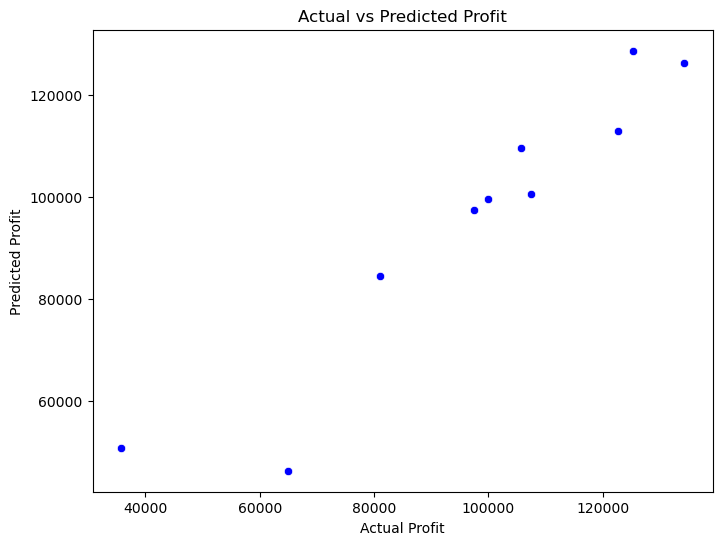

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.show()